In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/pollution.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [145]:
condition = (df['Station code'] == 108)
df = df[condition]
df.reset_index(drop = True, inplace = True)

In [146]:
df = df.drop(['Station code','Address','Latitude','Longitude'], axis=1)
df["Measurement date"] = pd.to_datetime(df["Measurement date"])
df.head()

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,0.004,0.045,0.003,0.8,68.0,63.0
1,2017-01-01 01:00:00,0.004,0.045,0.003,0.9,71.0,62.0
2,2017-01-01 02:00:00,0.004,0.043,0.003,0.9,69.0,62.0
3,2017-01-01 03:00:00,0.004,0.039,0.003,0.7,70.0,63.0
4,2017-01-01 04:00:00,0.004,0.038,0.003,0.8,69.0,59.0


In [147]:
weather_df = pd.concat(
    [
        pd.concat(
            [pd.read_csv('data/2017.csv'),pd.read_csv('data/2018.csv')],
            ignore_index = True
        ),
        pd.read_csv('data/2019.csv')
    ],
    ignore_index = True
)
weather_df.tail()
weather_df = weather_df.drop(["Station code"],axis=1)
weather_df["Measurement date"] = pd.to_datetime(weather_df['Measurement date'])
weather_df.head()

,Measurement date,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
0,2017-01-01 01:00:00,NaN,1.4,20.0,78.0,1018.9,-0.9
1,2017-01-01 02:00:00,NaN,1.9,50.0,81.0,1018.5,-1.8
2,2017-01-01 03:00:00,NaN,2.0,50.0,84.0,1018.8,-2.1
3,2017-01-01 04:00:00,NaN,1.6,20.0,85.0,1018.6,-2.4
4,2017-01-01 05:00:00,NaN,1.4,50.0,86.0,1018.3,-2.6


In [148]:
df = pd.merge(df,weather_df, how='left', on = 'Measurement date')
df['precipitation'] = df['precipitation'].fillna(0)
df = df.fillna(method = "bfill")
df['PM10'] = df['PM10'].replace(-1,0)
df.sort_values(by=['PM10'],ascending=False).head(150)

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
4404,2017-07-03 12:00:00,0.000,0.000,0.000,0.0,1661.0,0.0,0.0,2.9,230.0,80.0,996.1,29.5
23718,2019-10-01 20:00:00,0.004,0.025,0.017,0.8,985.0,31.0,0.0,3.6,140.0,69.0,1007.9,24.5
14183,2018-08-14 23:00:00,0.006,0.013,0.032,0.4,985.0,23.0,0.0,0.4,0.0,65.0,999.5,28.5
14635,2018-09-02 19:00:00,0.004,0.021,0.030,0.5,985.0,11.0,0.0,1.5,140.0,54.0,997.4,27.7
14519,2018-08-28 23:00:00,0.004,0.024,0.005,0.5,985.0,1.0,3.5,1.0,90.0,97.0,1000.6,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,2018-04-26 16:00:00,0.003,0.017,0.062,0.7,336.0,325.0,0.0,2.5,200.0,23.0,1002.2,31.3
11057,2018-04-06 17:00:00,0.002,0.015,0.035,0.3,333.0,30.0,0.0,4.4,270.0,50.0,1000.5,9.3
11056,2018-04-06 16:00:00,0.002,0.015,0.033,0.3,319.0,30.0,0.0,4.0,270.0,50.0,1000.9,10.4
6856,2017-10-13 16:00:00,0.003,0.018,0.031,0.4,317.0,327.0,0.0,4.7,290.0,35.0,1011.0,18.2


In [149]:
df['Measurement date'] = pd.to_datetime(df['Measurement date'], unit = 'ms', origin = 'unix').astype(int)

df

/tmp/ipykernel_4741/1888872887.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Measurement date'] = pd.to_datetime(df['Measurement date'], unit = 'ms', origin = 'unix').astype(int)


,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
0,1483228800000000000,0.004,0.045,0.003,0.8,68.0,63.0,0.0,1.4,20.0,78.0,1018.9,-0.9
1,1483232400000000000,0.004,0.045,0.003,0.9,71.0,62.0,0.0,1.4,20.0,78.0,1018.9,-0.9
2,1483236000000000000,0.004,0.043,0.003,0.9,69.0,62.0,0.0,1.9,50.0,81.0,1018.5,-1.8
3,1483239600000000000,0.004,0.039,0.003,0.7,70.0,63.0,0.0,2.0,50.0,84.0,1018.8,-2.1
4,1483243200000000000,0.004,0.038,0.003,0.8,69.0,59.0,0.0,1.6,20.0,85.0,1018.6,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25889,1577818800000000000,0.002,0.022,0.015,0.5,22.0,9.0,0.0,1.7,290.0,38.0,1024.1,-3.6
25890,1577822400000000000,0.002,0.021,0.015,0.5,22.0,12.0,0.0,2.9,290.0,41.0,1024.1,-4.1
25891,1577826000000000000,0.002,0.023,0.012,0.5,20.0,9.0,0.0,0.8,20.0,43.0,1023.9,-4.4
25892,1577829600000000000,0.002,0.027,0.007,0.5,21.0,8.0,0.0,0.0,0.0,42.0,1023.3,-4.6


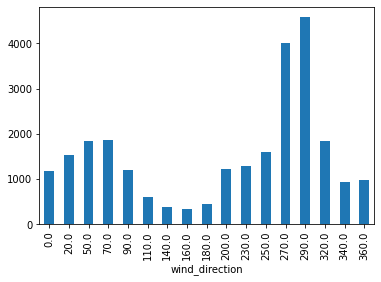

In [150]:
df.groupby('wind_direction').size().plot(kind='bar')
plt.show()


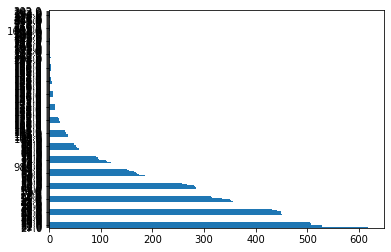

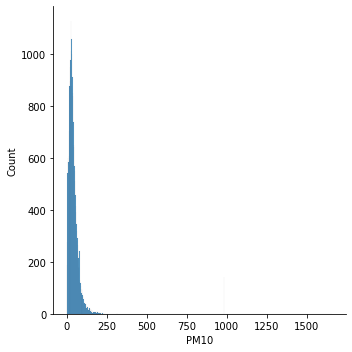

In [151]:
df['PM10'].value_counts(sort=True,dropna = False).plot(kind='barh')
sns.displot(df['PM10'])

Series([], dtype: int64)


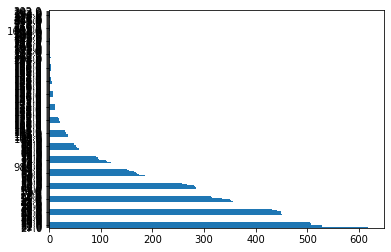

In [152]:
# ~30 좋음
# 30~80 보통
# 80~150 나쁨
# 150~ 매우 나쁨

value_cnts = df['PM10'].value_counts(sort=True,dropna = False).tolist()
value_cnts_index = df['PM10'].value_counts(sort=True,dropna = False).index.tolist()

good_list = []
normal_list = []
bad_list = []
verybad_list = []

for i in range(len(value_cnts)):
    if value_cnts[i] <= 30:
        good_list.append(value_cnts_index[i])
    elif value_cnts[i] <= 80:
        normal_list.append(value_cnts_index[i])
    elif value_cnts[i] <= 150:
        bad_list.append(value_cnts_index[i])
    else:
        verybad_list.append(value_cnts_index[i])
    

def giveGroup(value):
    if value in good_list:
        return "GOOD"
    elif value in normal_list:
        return "NORMAL"
    elif value in bad_list:
        return "BAD"
    elif value in verybad_list:
        return "VERY BAD"

# df['PM10'] = df.apply(lambda x: giveGroup(x['PM10']),axis = 1)

df.to_csv("show.csv", index = False)

df['PM10'].value_counts(sort=True,dropna = False).plot(kind='barh')

print(df[(df['PM10'] == "GOOD")].value_counts())
plt.show()

In [153]:
# sampling_list = ["VERY BAD", "BAD", "NORMAL"]

# new_df = df[df['PM10'] == "GOOD"]

# good_count = len(new_df)

# for class_name in sampling_list:
#     class_index = df[df['PM10'] == class_name].index
#     under_sample_index = np.random.choice(class_index, good_count, replace = False)
#     under_sample = df.loc[under_sample_index]
#     new_df = new_df.append(under_sample)

# new_df = new_df.sample(frac=1).reset_index(drop=True)

# new_df['PM10'].value_counts(sort=True, dropna=False).plot(kind = "barh")
# plt.show()


In [154]:
from numpy import array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras import backend as K

# classes = ["GOOD","NORMAL","BAD","VERY BAD"]

# temp_dict = {}
# for c in classes:
#     temp_dict[c] = new_df[new_df['PM10'] == c]


# train_set = []
# val_set = []
# test_set = []

# # for c in classes:
#     train = temp_dict[c].sample(frac = 0.8)
#     temp_dict[c] = temp_dict[c].drop(train.index)

#     validation = temp_dict[c].sample(frac = 0.5)
#     temp_dict[c] = temp_dict[c].drop(validation.index)

#     train_set.append(train)
#     val_set.append(validation)
#     test_set.append(temp_dict[c])



In [162]:
# train_df = train_set[0]
# val_df = val_set[0]
# test_df = test_set[0]

# for i in range(1,len(train_set)):
#     train_df = train_df.append(train_set[i])
#     val_df = val_df.append(val_set[i])
#     test_df = test_df.append(test_set[i])

# train_df = train_df.reset_index(drop=True)
# val_df = val_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)

train_set = df.sample(frac=0.8)
valid_set = df.drop(train_set.index).sample(frac = 0.5)
test_set = df.drop(train_set.index).drop(valid_set.index)



# tr_x = train_df.drop(columns = 'PM10')
# tr_y = train_df['PM10']

# val_x = val_df.drop(columns = 'PM10')
# val_y = val_df['PM10']

# test_x = test_df.drop(columns = 'PM10')
# test_y = test_df['PM10']

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
1,1483232400000000000,0.004,0.045,0.003,0.9,71.0,62.0,0.0,1.4,20.0,78.0,1018.9,-0.9
13,1483275600000000000,0.005,0.046,0.010,0.8,84.0,76.0,0.0,1.4,20.0,65.0,1017.9,5.1
16,1483286400000000000,0.005,0.051,0.009,0.8,87.0,78.0,0.0,1.2,230.0,67.0,1016.5,4.3
28,1483329600000000000,0.004,0.042,0.004,0.7,90.0,80.0,0.0,1.5,20.0,77.0,1012.7,1.7
30,1483336800000000000,0.005,0.048,0.003,0.8,87.0,77.0,0.3,1.1,20.0,89.0,1011.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25850,1577678400000000000,0.003,0.016,0.017,0.8,25.0,15.0,0.0,2.6,90.0,77.0,1010.6,3.2
25860,1577714400000000000,0.003,0.032,0.005,0.7,45.0,28.0,0.0,2.7,320.0,87.0,1011.3,5.9
25873,1577761200000000000,0.003,0.008,0.024,0.5,37.0,13.0,0.0,5.7,320.0,53.0,1021.3,-3.6
25878,1577779200000000000,0.002,0.017,0.018,0.4,17.0,8.0,0.0,3.7,340.0,42.0,1024.5,-6.2


In [156]:
train_stats = train_set.describe()
train_stats.pop("PM10")
train_stats = train_stats.transpose()

valid_stats = valid_set.describe()
valid_stats.pop("PM10")
valid_stats = valid_stats.transpose()

test_stats = test_set.describe()
test_stats.pop("PM10")
test_stats = test_stats.transpose()

In [157]:
train_labels = train_set.pop("PM10")
valid_labels = valid_set.pop("PM10")
test_labels = test_set.pop("PM10")

In [158]:
# tr_y = tr_y.astype('category')
# val_y = val_y.astype('category')
# test_y = test_y.astype('category')

# tr_y = tr_y.cat.codes
# tr_y = tf.keras.utils.to_categorical(tr_y)
# val_y = val_y.cat.codes
# val_y = tf.keras.utils.to_categorical(val_y)
# test_y = test_y.cat.codes
# test_y = tf.keras.utils.to_categorical(test_y)

# print(tr_x)

In [159]:
def norm(x):
    return(x - train_stats['mean']) / train_stats['std']

ntr_x = norm(train_set)
nval_x = norm(valid_set)
ntest_x = norm(test_set)

print(ntr_x)

       Measurement date       SO2       NO2        O3        CO     PM2.5  \
14147          0.150625  0.100105 -0.198396  0.233863 -0.035452 -0.148942   
15432          0.319899  0.087481 -0.531301  0.163893 -0.540528 -0.357515   
208           -1.685565  0.112728 -0.174617  0.397126 -0.372169  0.189989   
32            -1.708750  0.100105  0.752759 -0.442511  0.469625  0.502848   
1296          -1.542243  0.087481 -0.198396  0.653681 -0.203810 -0.188050   
...                 ...       ...       ...       ...       ...       ...   
10662         -0.308455  0.100105 -0.269733  0.350479 -0.540528 -0.292336   
20291          0.989485  0.074858 -0.127059  1.003530  0.132907  0.072666   
15688          0.353622  0.100105 -0.174617  0.327156 -0.203810 -0.070727   
70            -1.703744  0.074858  0.871654 -0.442511  0.132907 -0.122871   
14160          0.152338  0.100105 -0.245954 -0.465834 -0.372169 -0.266264   

       precipitation  wind_speed  wind_direction  humidity  local pressure 

[[ 0.08826438]
 [-0.05504611]
 [-0.02492237]
 [-0.19749162]
 [-0.09948716]
 [-0.014024  ]
 [ 0.1315414 ]
 [ 0.05346814]
 [ 0.02658606]
 [ 0.05200756]]
Epoch 1/300
648/648 [==============================] - 1s 725us/step - loss: 6229.4849 - mae: 26.1761 - mse: 6229.4849 - val_loss: 2986.2598 - val_mae: 19.1691 - val_mse: 2986.2598
Epoch 2/300
648/648 [==============================] - 0s 627us/step - loss: 5845.1362 - mae: 21.3183 - mse: 5845.1362 - val_loss: 2927.0427 - val_mae: 17.7704 - val_mse: 2927.0427
Epoch 3/300
648/648 [==============================] - 0s 644us/step - loss: 5788.3149 - mae: 20.5893 - mse: 5788.3149 - val_loss: 2897.5759 - val_mae: 17.8845 - val_mse: 2897.5759
Epoch 4/300
648/648 [==============================] - 0s 628us/step - loss: 5706.8735 - mae: 20.1341 - mse: 5706.8735 - val_loss: 2843.4248 - val_mae: 16.2314 - val_mse: 2843.4248
Epoch 5/300
648/648 [==============================] - 0s 623us/step - loss: 5654.1064 - mae: 19.2859 - mse: 5654.1064 - val_

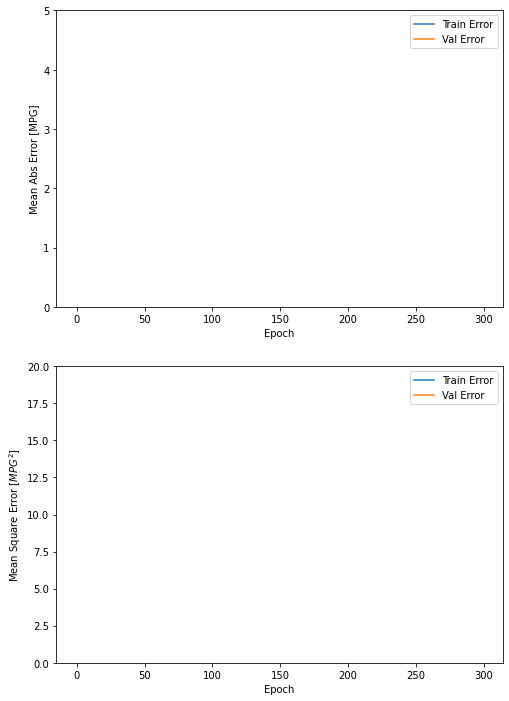

In [160]:
Nin = 12
Nh_l = [64,128]
Nout = 4

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def scheduler(epoch, lr):
    if epoch == 150:
        return lr * 0.1
    else:
        return lr

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


def train():
    
    # model = DNN(Nin,Nh_l,Nout)

    model = Sequential()

    # model.add(Input(shape = (12,)))
    model.add(Dense(Nh_l[0], activation='relu'))
    model.add(Dense(Nh_l[0], activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae','mse'])

    example_batch = ntr_x[:10]
    example_result = model.predict(example_batch)
    print(example_result)

    # # history = model.fit(tr_x, tr_y, epoch=300, batch_size=32, validation_data = (val_x, val_y))
    history = model.fit(ntr_x, train_labels, epochs=300, batch_size=32, validation_data = (nval_x, valid_labels))
    model.summary()
    
    plot_history(history)
 
    # solution = model.predict(test_x)
    # answer = test_y
    # count = 0
    # total = len(test_y)

    # for i in range(len(test_y)):
    #     if (np.all(solution[i] == answer[i])):
    #         count += 1
    # print("Accuracy : ",count / total)


train()